In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/datasets/data.txt',sep = ',')

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'married', 'Education',
       'selfemployment', 'applicantincome', 'coapplicantincome', 'loanamount',
       'Loan_amount_term', 'Credit_history', 'loan_status', 'source',
       'dependents_0', 'dependents_1', 'dependents_2', 'dependents_3',
       'Property_area_0', 'Property_area_1', 'Property_area_2'],
      dtype='object')

In [ ]:
dataset.select_dtypes(include = object)

,Loan_ID,source
0,LP001002,train
1,LP001003,train
2,LP001005,train
3,LP001006,train
4,LP001008,train
...,...,...
976,LP002971,test
977,LP002975,test
978,LP002980,test
979,LP002986,test


In [ ]:
correlation = dataset.corr()

In [ ]:
correlation['loan_status'].sort_values(ascending = False)

loan_status          1.000000
Credit_history       0.629997
Property_area_1      0.097210
married              0.087094
dependents_2         0.039793
selfemployment       0.025475
Gender               0.025184
applicantincome      0.019114
Property_area_2      0.016472
dependents_0         0.009300
dependents_3        -0.013211
Unnamed: 0          -0.024146
Loan_amount_term    -0.030172
loanamount          -0.032697
dependents_1        -0.041545
coapplicantincome   -0.047418
Education           -0.073979
Property_area_0     -0.119188
Name: loan_status, dtype: float64

In [ ]:
dataset.shape

(981, 20)

In [ ]:



dataset.loanamount.unique()

array([120., 128.,  66., 141., 267.,  95., 158., 168., 349.,  70., 109.,
       200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315., 116.,
       112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320., 144.,
       184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97., 135.,
       180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187., 113.,
       176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,  25.,
       137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,  85.,
       259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242., 129.,
        30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87., 101.,
       495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,  90.,
       166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,  42.,
       280., 140., 155., 123., 279., 192., 304., 330., 150., 207., 436.,
        78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300., 376.,
       117.,  71., 490., 173.,  46., 228., 308., 23

In [ ]:
dataset.loanamount.sort_values(ascending=True)

568      9.0
14      17.0
94      25.0
133     25.0
555     26.0
       ...  
369    570.0
155    600.0
561    600.0
130    650.0
171    700.0
Name: loanamount, Length: 981, dtype: float64

In [ ]:
dataset.loanamount.max()

700.0

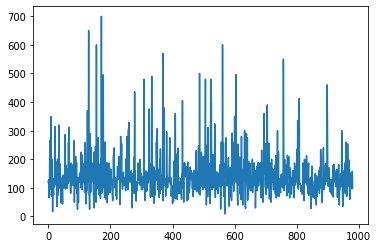

In [ ]:
plt.plot(dataset['loanamount'])

In [ ]:

dataset['loan_status'][dataset['loanamount']<200].value_counts()

1    630
0    231
Name: loan_status, dtype: int64

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'married', 'Education',
       'selfemployment', 'applicantincome', 'coapplicantincome', 'loanamount',
       'Loan_amount_term', 'Credit_history', 'loan_status', 'source',
       'dependents_0', 'dependents_1', 'dependents_2', 'dependents_3',
       'Property_area_0', 'Property_area_1', 'Property_area_2'],
      dtype='object')

In [ ]:
data = [dataset['loanamount'], dataset['applicantincome']]

headers = ["loanamount", "applicant_income"]

df3 = pd.concat(data, axis=1, keys=headers)


In [ ]:
df3.isnull().sum()

loanamount          0
applicant_income    0
dtype: int64

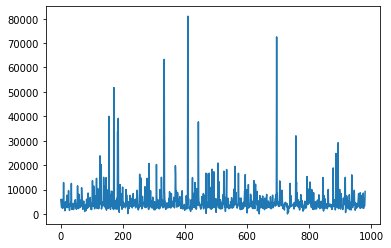

In [ ]:
plt.plot(df3.applicant_income)

In [ ]:
df3['Intrest_rate'] = 0.5

In [ ]:
df3

,loanamount,applicant_income,Intrest_rate
0,120.0,5849,0.5
1,128.0,4583,0.5
2,66.0,3000,0.5
3,120.0,2583,0.5
4,141.0,6000,0.5
...,...,...,...
976,113.0,4009,0.5
977,115.0,4158,0.5
978,126.0,3250,0.5
979,158.0,5000,0.5


In [ ]:

df3['Intrest_rate'].value_counts()

0.5    981
Name: Intrest_rate, dtype: int64

In [ ]:
for i in range(len(df3)):
  if (df3.applicant_income[i] < 40000 and df3.applicant_income[i] > 10000):
    df3.Intrest_rate[i] = 1
  if (df3.applicant_income[i] > 40000):
    df3.Intrest_rate[i] = 2
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:

df3.Intrest_rate.value_counts()

0.5    912
1.0     65
2.0      4
Name: Intrest_rate, dtype: int64

In [ ]:
pwd

'/content'

In [ ]:
import os
os.chdir('/content/drive/My Drive/datasets')

In [ ]:
pwd

'/content/drive/My Drive/datasets'

In [ ]:
df3.to_csv('Intrest_rate.csv')

In [ ]:
df3 = pd.read_csv('/content/drive/My Drive/datasets/Intrest_rate.csv')

In [ ]:
df3

,Unnamed: 0,loanamount,applicant_income
0,0,120.0,5849
1,1,128.0,4583
2,2,66.0,3000
3,3,120.0,2583
4,4,141.0,6000
...,...,...,...
976,976,113.0,4009
977,977,115.0,4158
978,978,126.0,3250
979,979,158.0,5000


In [ ]:
label = df3['Intrest_rate']
df3.drop(['Intrest_rate'],axis = 1,inplace = True)

In [ ]:
df3.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df3,label, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction = regressor.predict(X_test)

In [ ]:
def rmse(predictions, targets):
  return np.sqrt(((prediction - targets) ** 2).mean())

In [ ]:
rmse(prediction,y_test)

0.06838911816196147

In [ ]:
import json

In [ ]:
pwd

'/content/drive/My Drive/datasets'

In [ ]:
path = '/content/drive/My Drive/datasets/Intrest_rate.pkl'

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(regressor,path)

['/content/drive/My Drive/datasets/Intrest_rate.pkl']